In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

In [2]:
df = pd.read_csv('./housing.csv')
set_config(transform_output="pandas")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# There are null values that should be treated

In [4]:
df_copy = df.copy()
df_copy.drop('ocean_proximity',axis=1,inplace=True)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_copy)
df_copy = imp_mean.transform(df_copy)
df.iloc[:,:-1] = df_copy.iloc[:,:]
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Notice high positive and Negative correlations
We will try to replace these high correlations

/var/folders/vv/jrr00v852xj6f_6pp777r9zw0000gp/T/ipykernel_9039/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

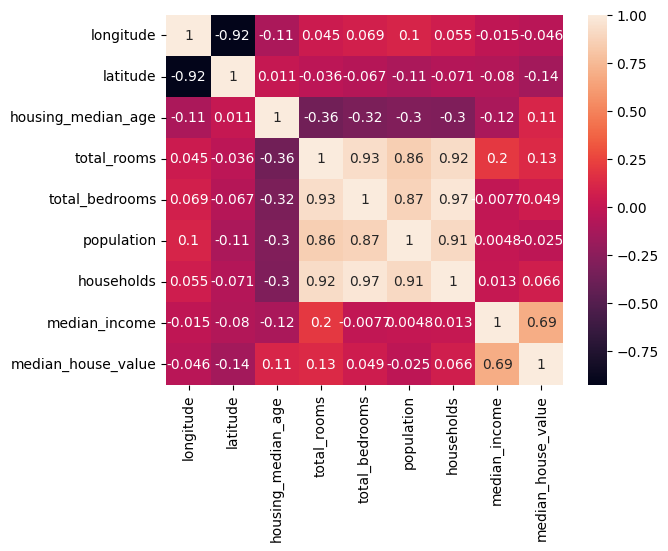

In [6]:
sns.heatmap(df.corr(),annot=True)

# Replacing total_bedrooms and total_rooms with bedroomPerRoom
bedroomPerRoom represents how many rooms are bed rooms

In [7]:
df['bedroomPerRoom'] = [i/j for (i,j) in list(zip(df['total_bedrooms'],df['total_rooms']))]
df["plPerRoom"] = df["population"] / df["total_rooms"]
# df.drop(['total_bedrooms'],axis=1, inplace=True)

# Replace household and population occupation
occupation represents number of occupiers of each houshold

/var/folders/vv/jrr00v852xj6f_6pp777r9zw0000gp/T/ipykernel_9039/1377182898.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

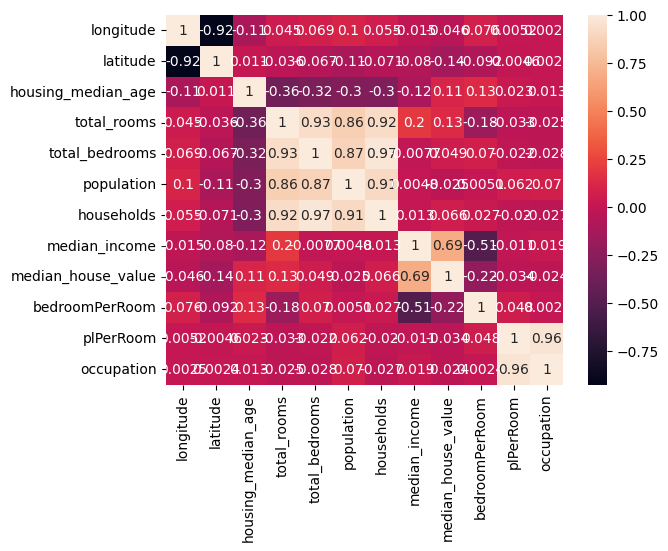

In [8]:
df['occupation'] = [i/j for (i,j) in list(zip(df['population'],df['households']))]
# df.drop(['households'],axis=1, inplace=True)
sns.heatmap(df.corr(),annot=True)

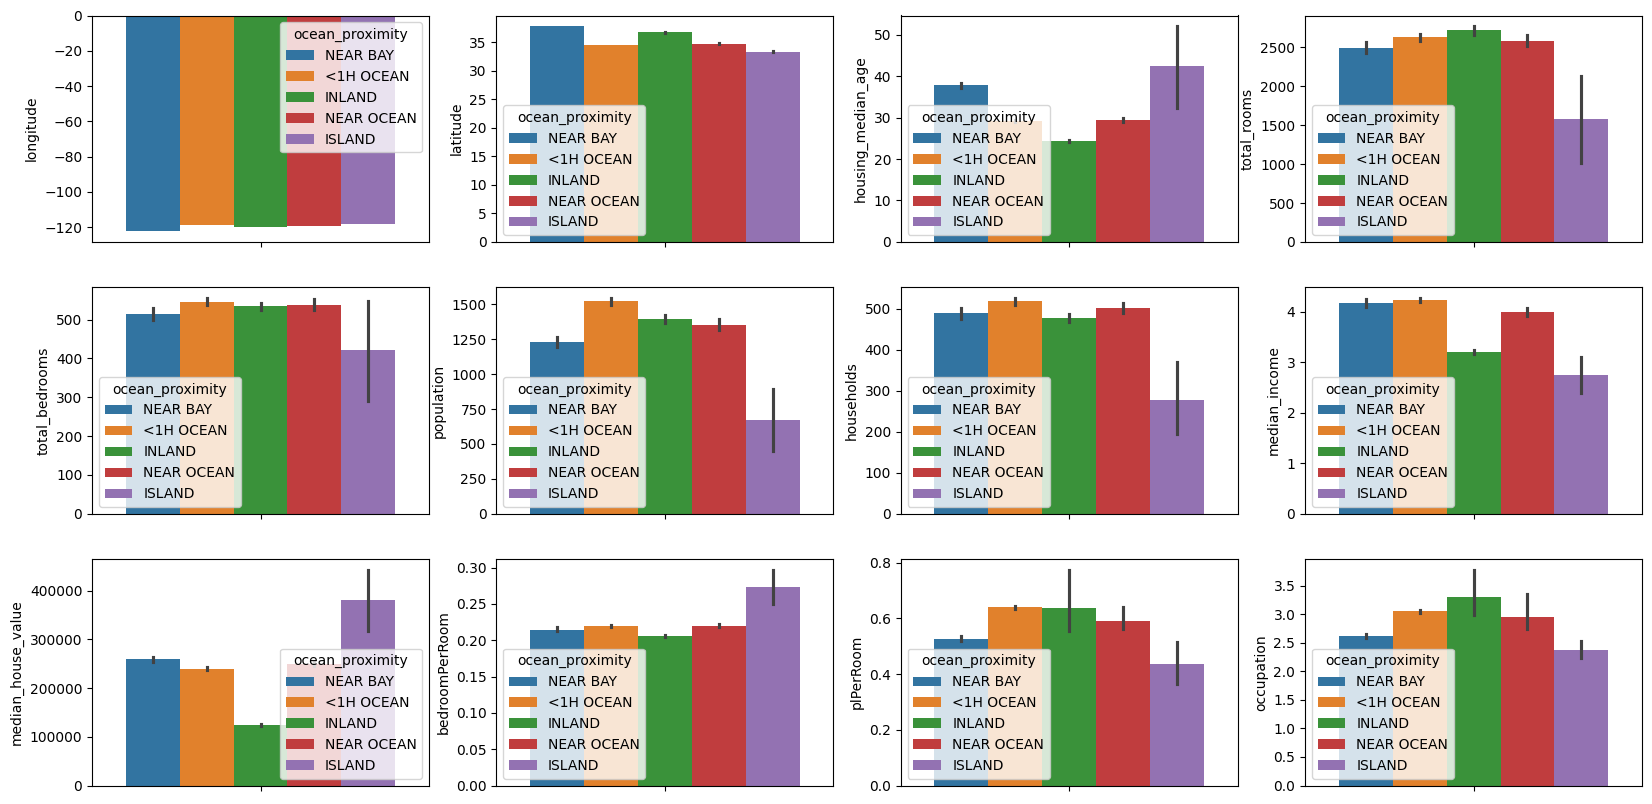

In [9]:
cols = list(df.drop('ocean_proximity',axis=1,inplace=False).columns)
plt.figure(figsize=(20,10))
for i in cols:
    plt.subplot(3,4,cols.index(i)+1)
    sns.barplot(data=df, y=i,hue='ocean_proximity')
plt.show()


In [10]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  bedroomPerRoom  plPerRoom  occupation  
0            NEAR BAY        0.146591   0.365909    2.555556  
1            NEAR BAY        0.155797   0.338217    2.109842  
2            NEAR BAY        0.129516   0.338105    2.802260  
3            NEAR BAY        0.184458   0.437991    2.547945  
4            NEAR BAY        0.172096   0.347265    2.181467  
...               ...             ...        ...         ...  
20635          INLAND        0.224625   0.507508    2.560606  
20636          INLAND        0.215208   0.510760    3.122807  
20637          INLAND        0.215173   0.446761    2.325635  
20638          INLAND        0.219892   0.398387    2.123209  
20639          INLAND        0.221185   0.498025    2.616981  

[20640 rows x 13 columns]

# Scalling values

In [11]:
scl = StandardScaler()
df_copy = df.copy()
df_copy.drop('ocean_proximity',axis=1,inplace=True)
df_copy = scl.fit_transform(df_copy)
df_copy['ocean_proximity'] = df['ocean_proximity']
df = df_copy
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1      -1.322844  1.043185           -0.607019     2.045890        1.355088   
2      -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3      -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4      -1.337818  1.038503            1.856182    -0.462404       -0.615066   
...          ...       ...                 ...          ...             ...   
20635  -0.758826  1.801647           -0.289187    -0.444985       -0.390860   
20636  -0.818722  1.806329           -0.845393    -0.888704       -0.925139   
20637  -0.823713  1.778237           -0.924851    -0.174995       -0.126106   
20638  -0.873626  1.778237           -0.845393    -0.355600       -0.307379   
20639  -0.833696  1.750146           -1.004309     0.068408        0.186352   

       population  households  median_income  median_house_value  \
0       -0.974429   -0.977033       2.344766            2.129631   
1        0.861439    1.669961       2.332238            1.314156   
2       -0.820777   -0.843637       1.782699            1.258693   
3       -0.766028   -0.733781       0.932968            1.165100   
4       -0.759847   -0.629157      -0.012881            1.172900   
...           ...         ...            ...                 ...   
20635   -0.512592   -0.443449      -1.216128           -1.115804   
20636   -0.944405   -1.008420      -0.691593           -1.124470   
20637   -0.369537   -0.174042      -1.142593           -0.992746   
20638   -0.604429   -0.393753      -1.054583           -1.058608   
20639   -0.033977    0.079672      -0.780129           -1.017878   

       bedroomPerRoom  plPerRoom  occupation ocean_proximity  
0           -0.973116  -0.087627   -0.049597        NEAR BAY  
1           -0.841159  -0.097193   -0.092512        NEAR BAY  
2           -1.217873  -0.097232   -0.025843        NEAR BAY  
3           -0.430311  -0.062727   -0.050329        NEAR BAY  
4           -0.607519  -0.094068   -0.085616        NEAR BAY  
...               ...        ...         ...             ...  
20635        0.145445  -0.038713   -0.049110          INLAND  
20636        0.010465  -0.037589    0.005021          INLAND  
20637        0.009963  -0.059697   -0.071735          INLAND  
20638        0.077613  -0.076408   -0.091225          INLAND  
20639        0.096140  -0.041989   -0.043682          INLAND  

[20640 rows x 13 columns]

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder().set_output()
temp = df.copy()
enc.fit(temp)
enc.categories_
temp = enc.transform(temp)
df['ocean_proximity'] = temp['ocean_proximity']
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1      -1.322844  1.043185           -0.607019     2.045890        1.355088   
2      -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3      -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4      -1.337818  1.038503            1.856182    -0.462404       -0.615066   
...          ...       ...                 ...          ...             ...   
20635  -0.758826  1.801647           -0.289187    -0.444985       -0.390860   
20636  -0.818722  1.806329           -0.845393    -0.888704       -0.925139   
20637  -0.823713  1.778237           -0.924851    -0.174995       -0.126106   
20638  -0.873626  1.778237           -0.845393    -0.355600       -0.307379   
20639  -0.833696  1.750146           -1.004309     0.068408        0.186352   

       population  households  median_income  median_house_value  \
0       -0.974429   -0.977033       2.344766            2.129631   
1        0.861439    1.669961       2.332238            1.314156   
2       -0.820777   -0.843637       1.782699            1.258693   
3       -0.766028   -0.733781       0.932968            1.165100   
4       -0.759847   -0.629157      -0.012881            1.172900   
...           ...         ...            ...                 ...   
20635   -0.512592   -0.443449      -1.216128           -1.115804   
20636   -0.944405   -1.008420      -0.691593           -1.124470   
20637   -0.369537   -0.174042      -1.142593           -0.992746   
20638   -0.604429   -0.393753      -1.054583           -1.058608   
20639   -0.033977    0.079672      -0.780129           -1.017878   

       bedroomPerRoom  plPerRoom  occupation  ocean_proximity  
0           -0.973116  -0.087627   -0.049597              3.0  
1           -0.841159  -0.097193   -0.092512              3.0  
2           -1.217873  -0.097232   -0.025843              3.0  
3           -0.430311  -0.062727   -0.050329              3.0  
4           -0.607519  -0.094068   -0.085616              3.0  
...               ...        ...         ...              ...  
20635        0.145445  -0.038713   -0.049110              1.0  
20636        0.010465  -0.037589    0.005021              1.0  
20637        0.009963  -0.059697   -0.071735              1.0  
20638        0.077613  -0.076408   -0.091225              1.0  
20639        0.096140  -0.041989   -0.043682              1.0  

[20640 rows x 13 columns]

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>,
        <AxesSubplot: title={'center': 'total_rooms'}>],
       [<AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>],
       [<AxesSubplot: title={'center': 'median_house_value'}>,
        <AxesSubplot: title={'center': 'bedroomPerRoom'}>,
        <AxesSubplot: title={'center': 'plPerRoom'}>,
        <AxesSubplot: title={'center': 'occupation'}>],
       [<AxesSubplot: title={'center': 'ocean_proximity'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

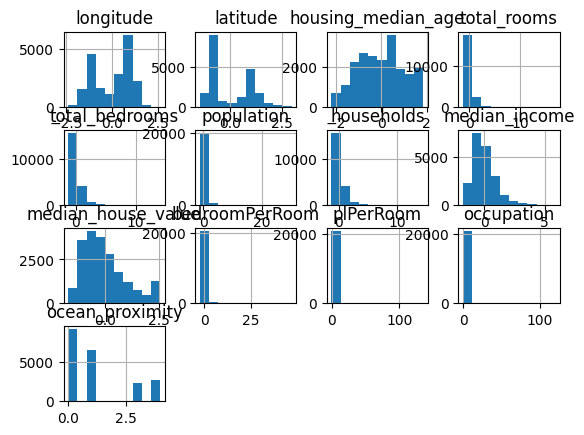

In [13]:
df.hist()

# There might be some outliers

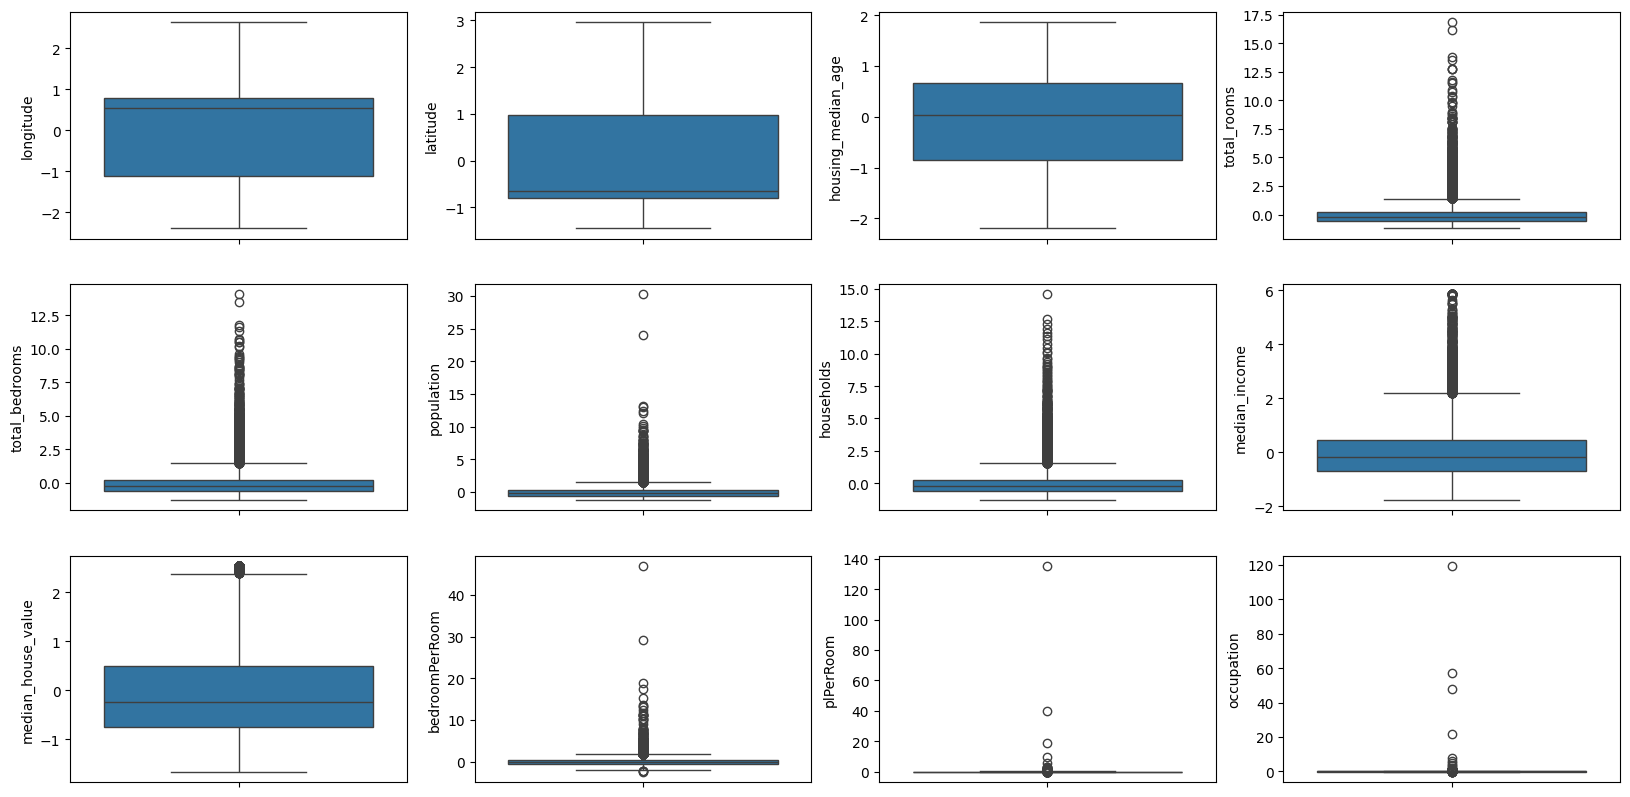

In [14]:
cols = list(df.drop('ocean_proximity',axis=1,inplace=False).columns)
plt.figure(figsize=(20,10))
for i in cols:
    plt.subplot(3,4,cols.index(i)+1)
    sns.boxplot(data=df,y=i)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-package

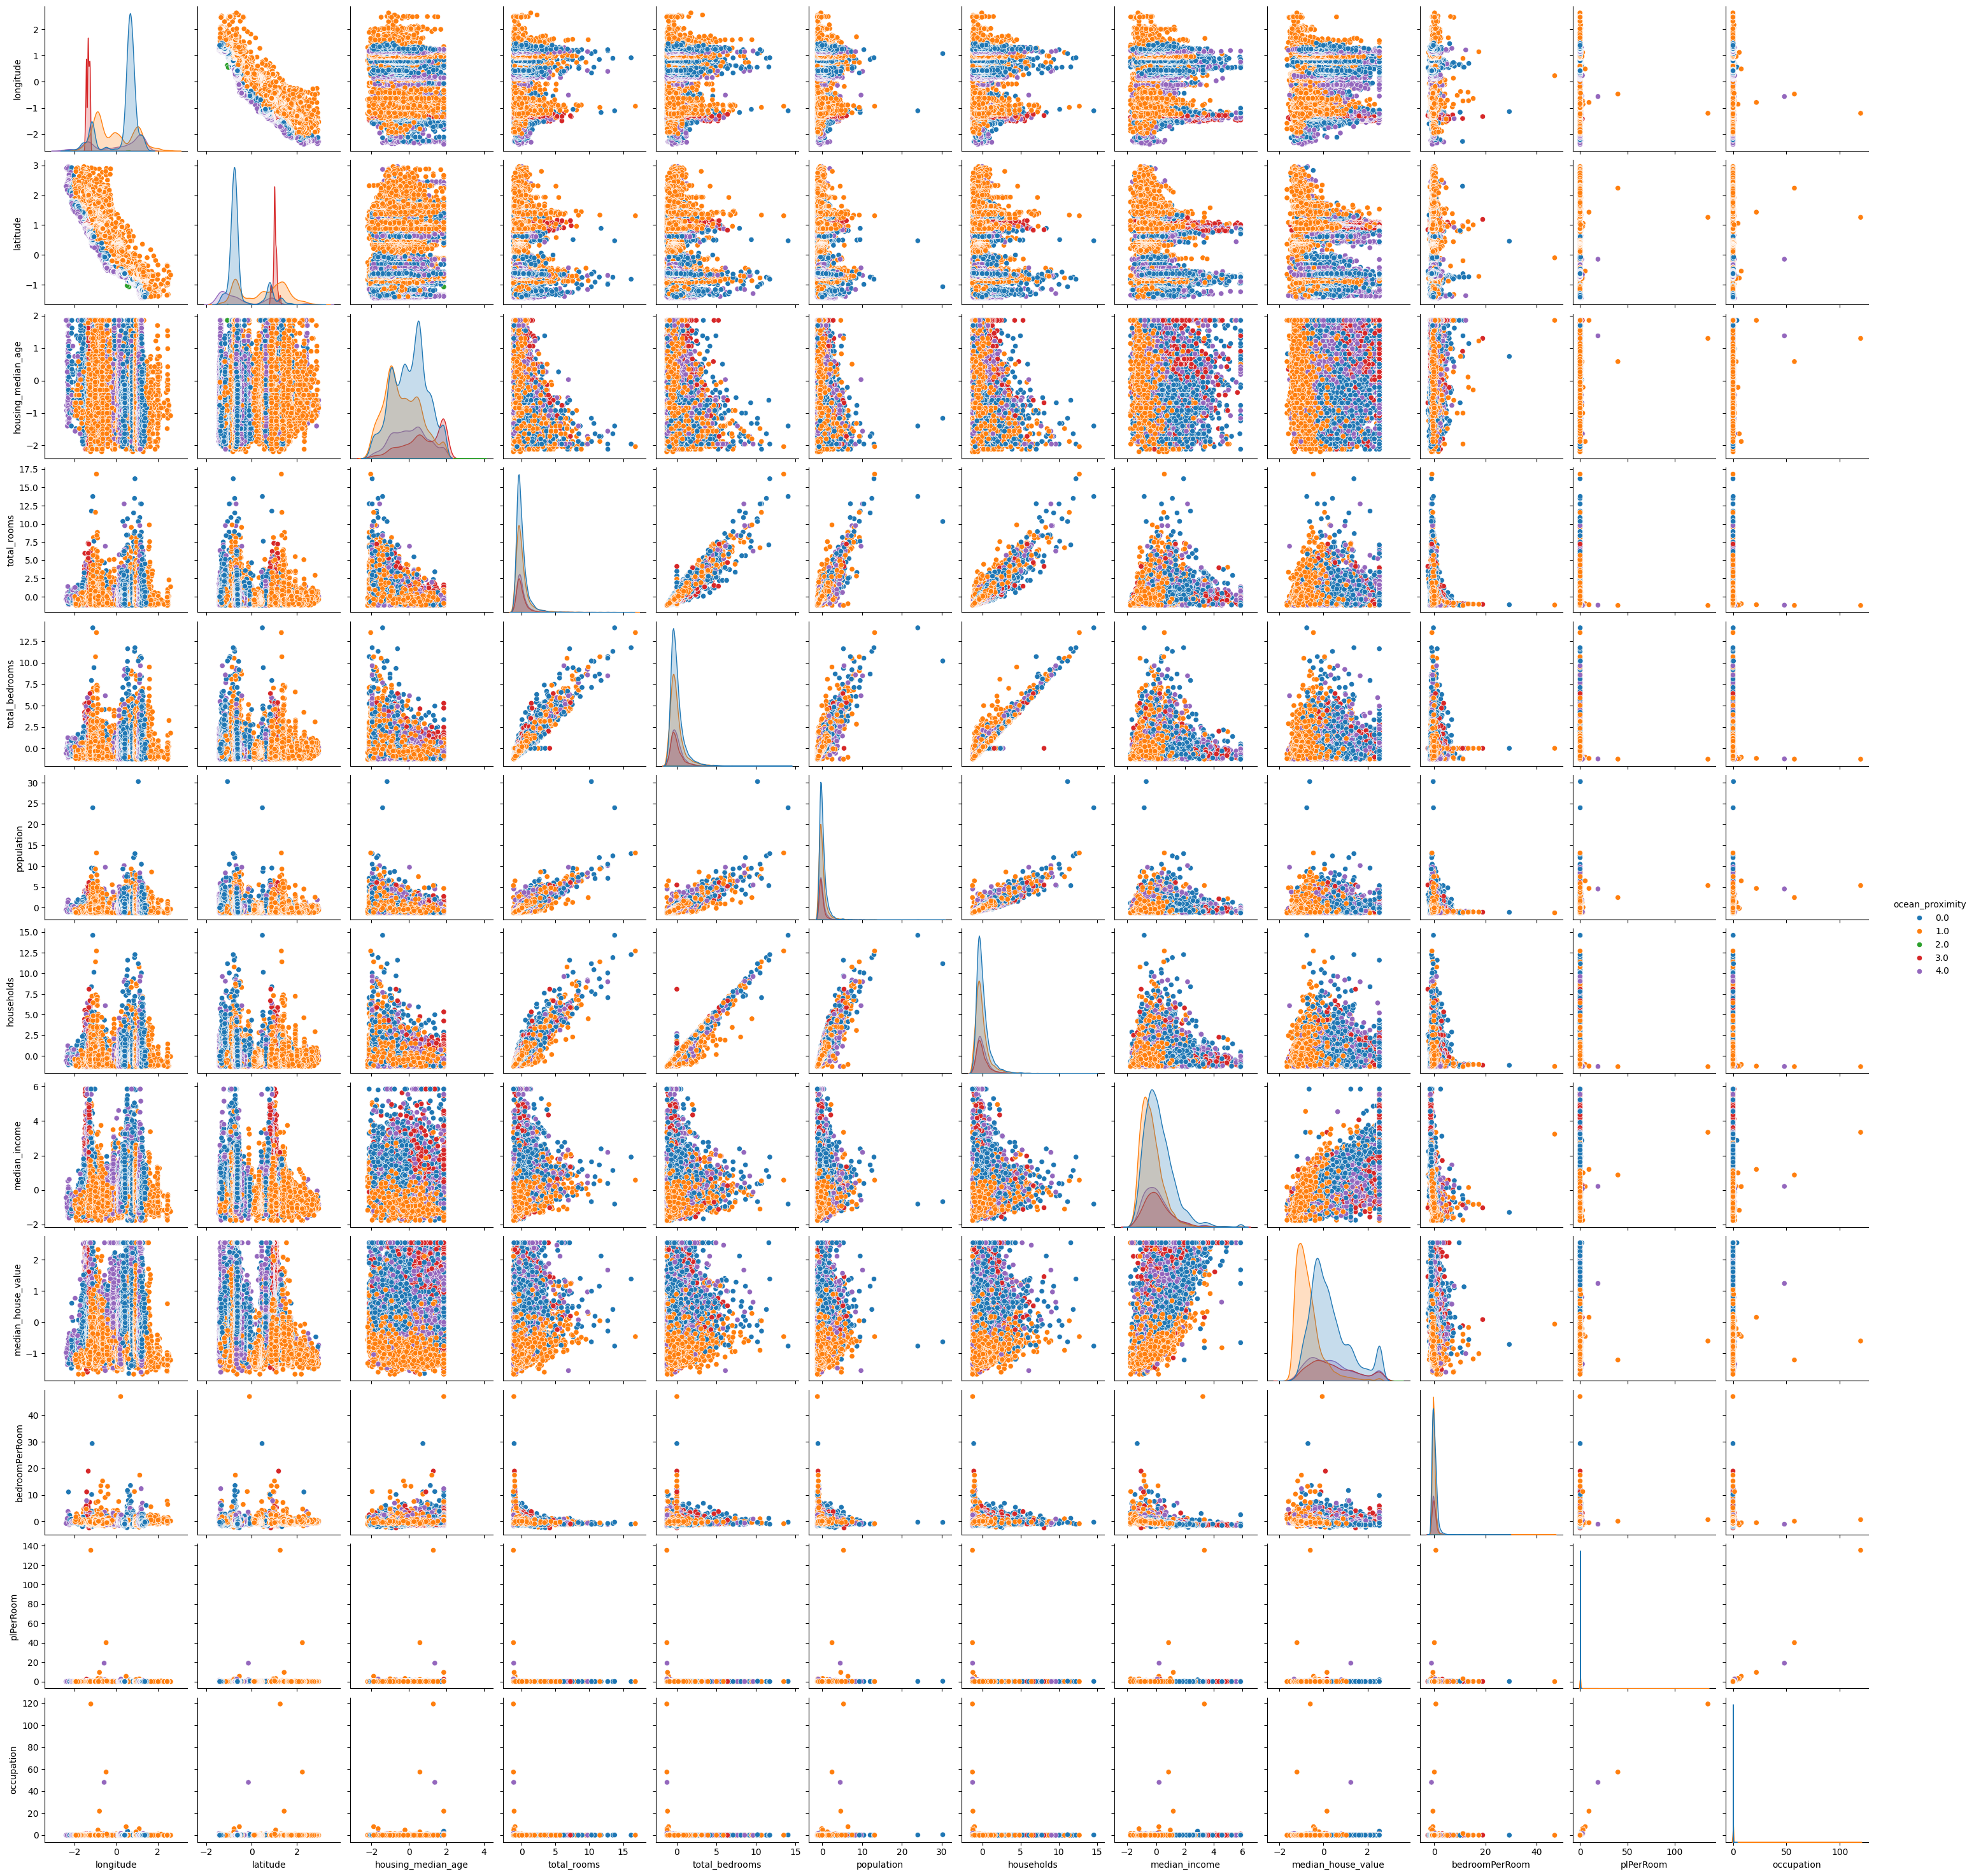

In [15]:
sns.pairplot(data=df, hue='ocean_proximity', palette=sns.color_palette("tab10"))

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(df,df['ocean_proximity']):
    train = df.loc[train_index]
    test = df.loc[test_index]

In [17]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
bedroomPerRoom        0
plPerRoom             0
occupation            0
ocean_proximity       0
dtype: int64

In [18]:
x_train,y_train = train.drop('median_house_value', axis=1,inplace=False),train['median_house_value']
x_test,y_test = test.drop('median_house_value', axis=1,inplace=False),test['median_house_value']

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X=x_train, y=y_train)

LinearRegression()

In [20]:
y_predict = reg.predict(X=x_test)

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

y_predict2 = reg.predict(X=x_train)
print(mean_squared_error(y_test,y_predict), mean_squared_error(y_train,y_predict2))
print(r2_score(y_test,y_predict)*100, r2_score(y_train,y_predict2)*100)

0.358801162489226 0.363810464897476
64.46510433356865 63.52988060971565


In [22]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha=0.01,random_state=0)
reg.fit(X=x_train, y=y_train)
y_predict = reg.predict(X=x_test)
y_predict2 = reg.predict(X=x_train)
print(mean_squared_error(y_test,y_predict), mean_squared_error(y_train,y_predict2))
print(r2_score(y_test,y_predict)*100, r2_score(y_train,y_predict2)*100)

0.35879987432072896 0.3638104649060709
64.46523191100685 63.52988060885405


In [23]:
reg = linear_model.Lasso(alpha=0.001,tol=0.1,random_state=0,max_iter=30)
reg.fit(X=x_train, y=y_train)
y_predict = reg.predict(X=x_test)
y_predict2 = reg.predict(X=x_train)
print(mean_squared_error(y_test,y_predict), mean_squared_error(y_train,y_predict2))
print(r2_score(y_test,y_predict)*100, r2_score(y_train,y_predict2)*100)

0.35630018461107205 0.36430051581104533
64.71279580521185 63.48075553759814


In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=12, max_features = 10, n_estimators= 150, ccp_alpha = 1.5e-05, min_impurity_decrease = 5e-07)
regressor.fit(x_train,y_train)
y_predict = regressor.predict(x_test)
y_predict2 = regressor.predict(X=x_train)
print(mean_squared_error(y_test,y_predict), mean_squared_error(y_train,y_predict2))
print(r2_score(y_test,y_predict)*100, r2_score(y_train,y_predict2)*100)
regressor.get_params()

0.17944845865150155 0.03481225904267872
82.22781049134838 96.51025089701643


{'bootstrap': True,
 'ccp_alpha': 1.5e-05,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 5e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

In [25]:

regressor.score(x_test, y_test)

0.8222781049134837

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=41, min_samples_leaf=11,min_impurity_decrease = 0.000005)
regressor.fit(x_train,y_train)
regressor.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'bedroomPerRoom', 'plPerRoom', 'occupation', 'ocean_proximity'],
      dtype=object)

In [27]:
y_predict = regressor.predict(x_test)
y_predict2 = regressor.predict(X=x_train)
print(mean_squared_error(y_test,y_predict), mean_squared_error(y_train,y_predict2))
print(r2_score(y_test,y_predict)*100, r2_score(y_train,y_predict2)*100)

0.2505022451631561 0.1383579893215408
75.19079624958891 86.13032643088412
